In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df=pd.read_csv("data.csv") 
df

Age Attrition     BusinessTravel  DailyRate              Department   
0      41       Yes      Travel_Rarely       1102                   Sales  \
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount   
0                    1          2  Life Sciences              1  \
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours   
0                  1  ...                         1            80  \
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear   
0                    0                  8                      0  \
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole   
0                  1               6                  4  \
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [12]:
df.isnull().sum().to_frame('nan_count')

nan_count
Age                               0
Attrition                         0
BusinessTravel                    0
DailyRate                         0
Department                        0
DistanceFromHome                  0
Education                         0
EducationField                    0
EmployeeCount                     0
EmployeeNumber                    0
EnvironmentSatisfaction           0
Gender                            0
HourlyRate                        0
JobInvolvement                    0
JobLevel                          0
JobRole                           0
JobSatisfaction                   0
MaritalStatus                     0
MonthlyIncome                     0
MonthlyRate                       0
NumCompaniesWorked                0
Over18                            0
OverTime                          0
PercentSalaryHike                 0
PerformanceRating                 0
RelationshipSatisfaction          0
StandardHours                     0
StockOptionLevel                  0
TotalWorkingYears                 0
TrainingTimesLastYear             0
WorkLifeBalance                   0
YearsAtCompany                    0
YearsInCurrentRole                0
YearsSinceLastPromotion           0
YearsWithCurrManager              0

In [6]:
df.isna().sum().to_frame('nan_count')

nan_count
Age                               0
Attrition                         0
BusinessTravel                    0
DailyRate                         0
Department                        0
DistanceFromHome                  0
Education                         0
EducationField                    0
EmployeeCount                     0
EmployeeNumber                    0
EnvironmentSatisfaction           0
Gender                            0
HourlyRate                        0
JobInvolvement                    0
JobLevel                          0
JobRole                           0
JobSatisfaction                   0
MaritalStatus                     0
MonthlyIncome                     0
MonthlyRate                       0
NumCompaniesWorked                0
Over18                            0
OverTime                          0
PercentSalaryHike                 0
PerformanceRating                 0
RelationshipSatisfaction          0
StandardHours                     0
StockOptionLevel                  0
TotalWorkingYears                 0
TrainingTimesLastYear             0
WorkLifeBalance                   0
YearsAtCompany                    0
YearsInCurrentRole                0
YearsSinceLastPromotion           0
YearsWithCurrManager              0

In [9]:
def remove_outliers_iqr(df):
    for column in df.columns :
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5* IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [54]:
numeric_df = df.select_dtypes(include='number')
numeric_df=remove_outliers_iqr(numeric_df)
numeric_df


Age  DailyRate  DistanceFromHome  Education  EmployeeCount   
2      37       1373                 2          2              1  \
3      33       1392                 3          4              1   
5      32       1005                 2          2              1   
11     29        153                15          2              1   
12     31        670                26          1              1   
...   ...        ...               ...        ...            ...   
1463   31        325                 5          3              1   
1464   26       1167                 5          3              1   
1465   36        884                23          2              1   
1468   49       1023                 2          3              1   
1469   34        628                 8          3              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement   
2                  4                        4          92               2  \
3                  5                        4          56               3   
5                  8                        4          79               3   
11                15                        4          49               2   
12                16                        1          31               3   
...              ...                      ...         ...             ...   
1463            2057                        2          74               3   
1464            2060                        4          30               2   
1465            2061                        3          41               4   
1468            2065                        4          63               2   
1469            2068                        2          82               4   

      JobLevel  ...  RelationshipSatisfaction  StandardHours   
2            1  ...                         2             80  \
3            1  ...                         3             80   
5            1  ...                         3             80   
11           2  ...                         4             80   
12           1  ...                         4             80   
...        ...  ...                       ...            ...   
1463         2  ...                         2             80   
1464         1  ...                         4             80   
1465         2  ...                         3             80   
1468         2  ...                         4             80   
1469         2  ...                         1             80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear   
2                    0                  7                      3  \
3                    0                  8                      3   
5                    0                  8                      2   
11                   0                 10                      3   
12                   1                  5                      1   
...                ...                ...                    ...   
1463                 0                 10                      2   
1464                 0                  5                      2   
1465                 1                 17                      3   
1468                 0                 17                      3   
1469                 0                  6                      3   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole   
2                   3               0                   0  \
3                   3               8                   7   
5                   2               7                   7   
11                  3               9                   5   
12                  2               5                   2   
...               ...             ...                 ...   
1463                3               9                   4   
1464                3               4                   2   
1465                3               5                   2   
1468                2               9                   6   
1469   

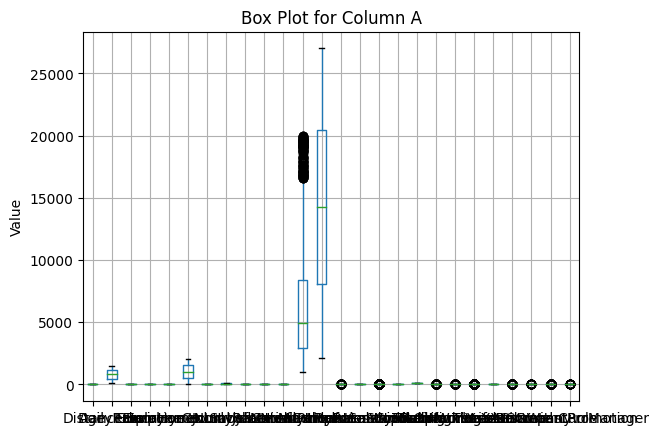

In [36]:
df.boxplot()
plt.title("Box Plot for Column A")
plt.ylabel("Value")
plt.show()
#표준화 필요.

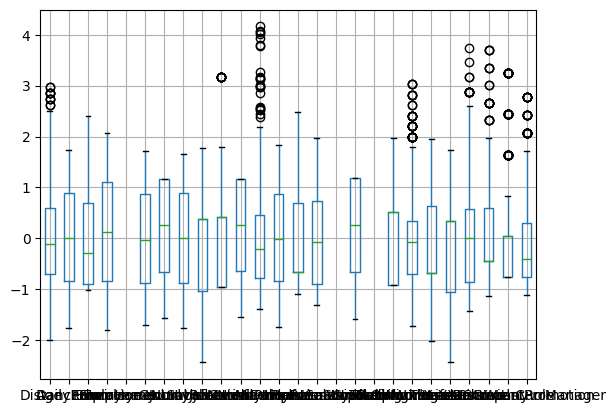

In [55]:
z_df=(numeric_df-numeric_df.mean())/numeric_df.std()
z_df.boxplot()
plt.show()
#분포 확인. 분산과 

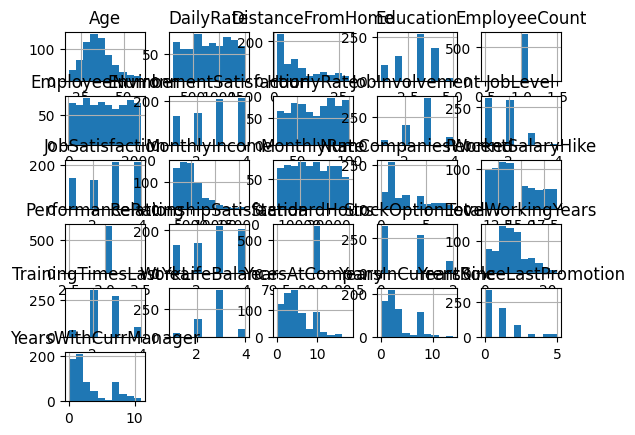

In [56]:
numeric_df.hist()
plt.show()

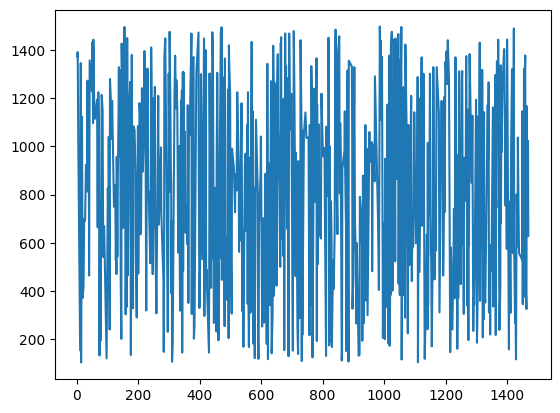

In [63]:
plt.plot(numeric_df['DailyRate'])
plt.show()
#지금까지 했던 것은 그냥 각각 변수들의 분포만 본 것이지만, 결국 종속변수에 따른 시각화 필요.

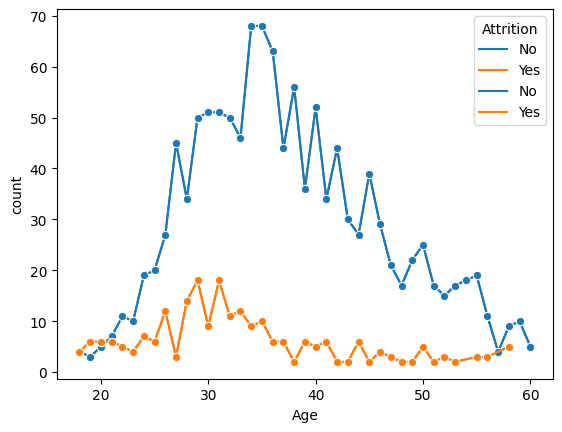

In [75]:
count_df = df.groupby(['Age', 'Attrition']).size().reset_index(name='count')
sns.lineplot(x='Age', y='count', hue='Attrition', data=count_df, marker='o')
plt.show()
#나이에 따라 yes에 변화보다는 no의 변화가 심하다. 갯수로 분포 확인

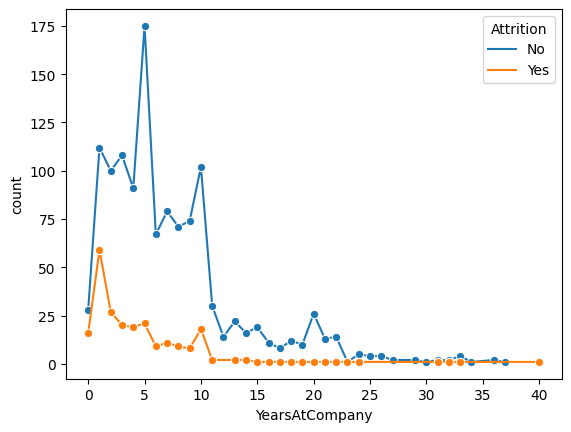

In [79]:
count_df = df.groupby(['YearsAtCompany', 'Attrition']).size().reset_index(name='count')
sns.lineplot(x='YearsAtCompany', y='count', hue='Attrition', data=count_df, marker='o')
plt.show()
#이제 비율로 따지면 no가 이제 점점 작아지고, yes가 커질 것이다.

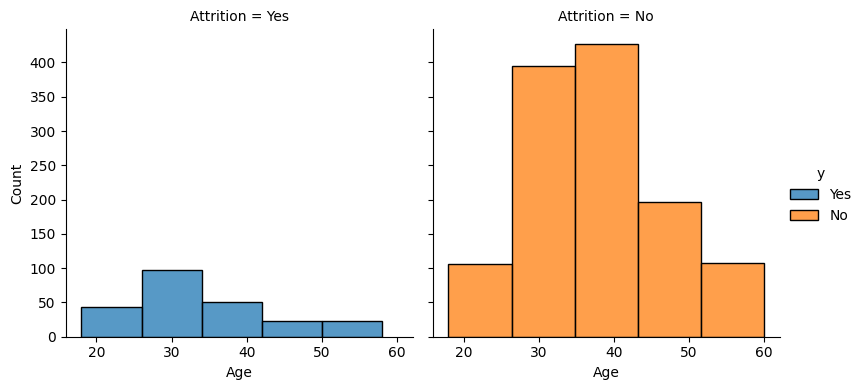

In [77]:
g = sns.FacetGrid(df, col='Attrition', hue='Attrition', height=4)
g.map(sns.histplot, 'Age', bins=5)
g.set_axis_labels('Age', 'Count')
g.add_legend(title='y')
plt.show() #나이에 따른 히스토그램

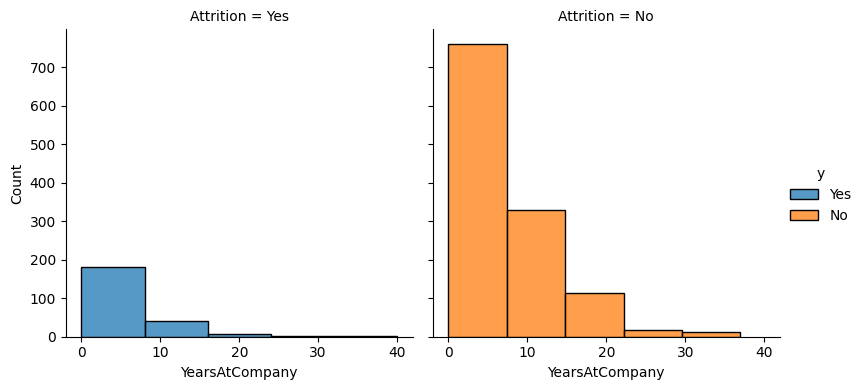

In [80]:
g = sns.FacetGrid(df, col='Attrition', hue='Attrition', height=4)
g.map(sns.histplot, 'YearsAtCompany', bins=5)
g.set_axis_labels('YearsAtCompany', 'Count')
g.add_legend(title='y')
plt.show() 


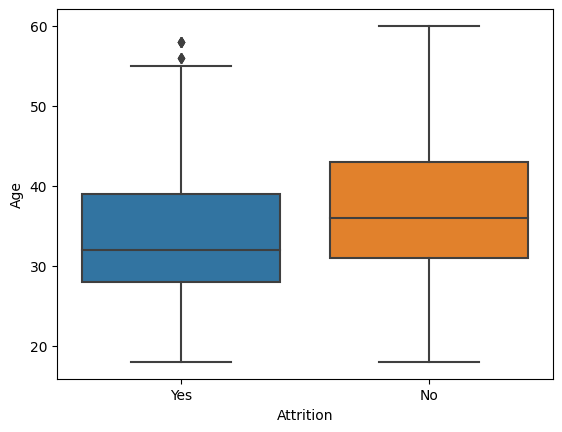

In [78]:
sns.boxplot(x='Attrition', y='Age', data=df)
plt.show()
#boxplot을 이용.

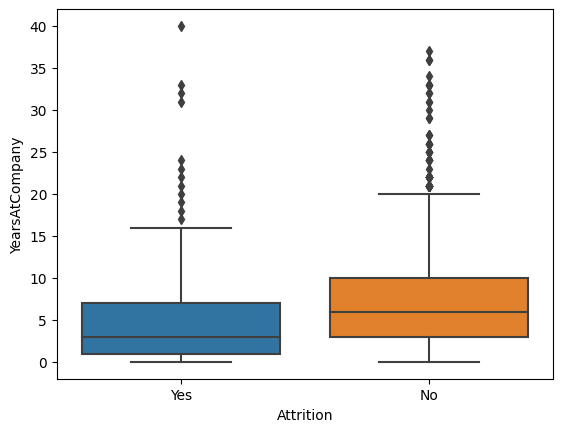

In [81]:
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.show()

먼저 시각화를 해 보아서 attrtion과의 다른 변수간의 관계를 파악하여 보았다.
비율로 보았을 때, 유의미한 결과. 

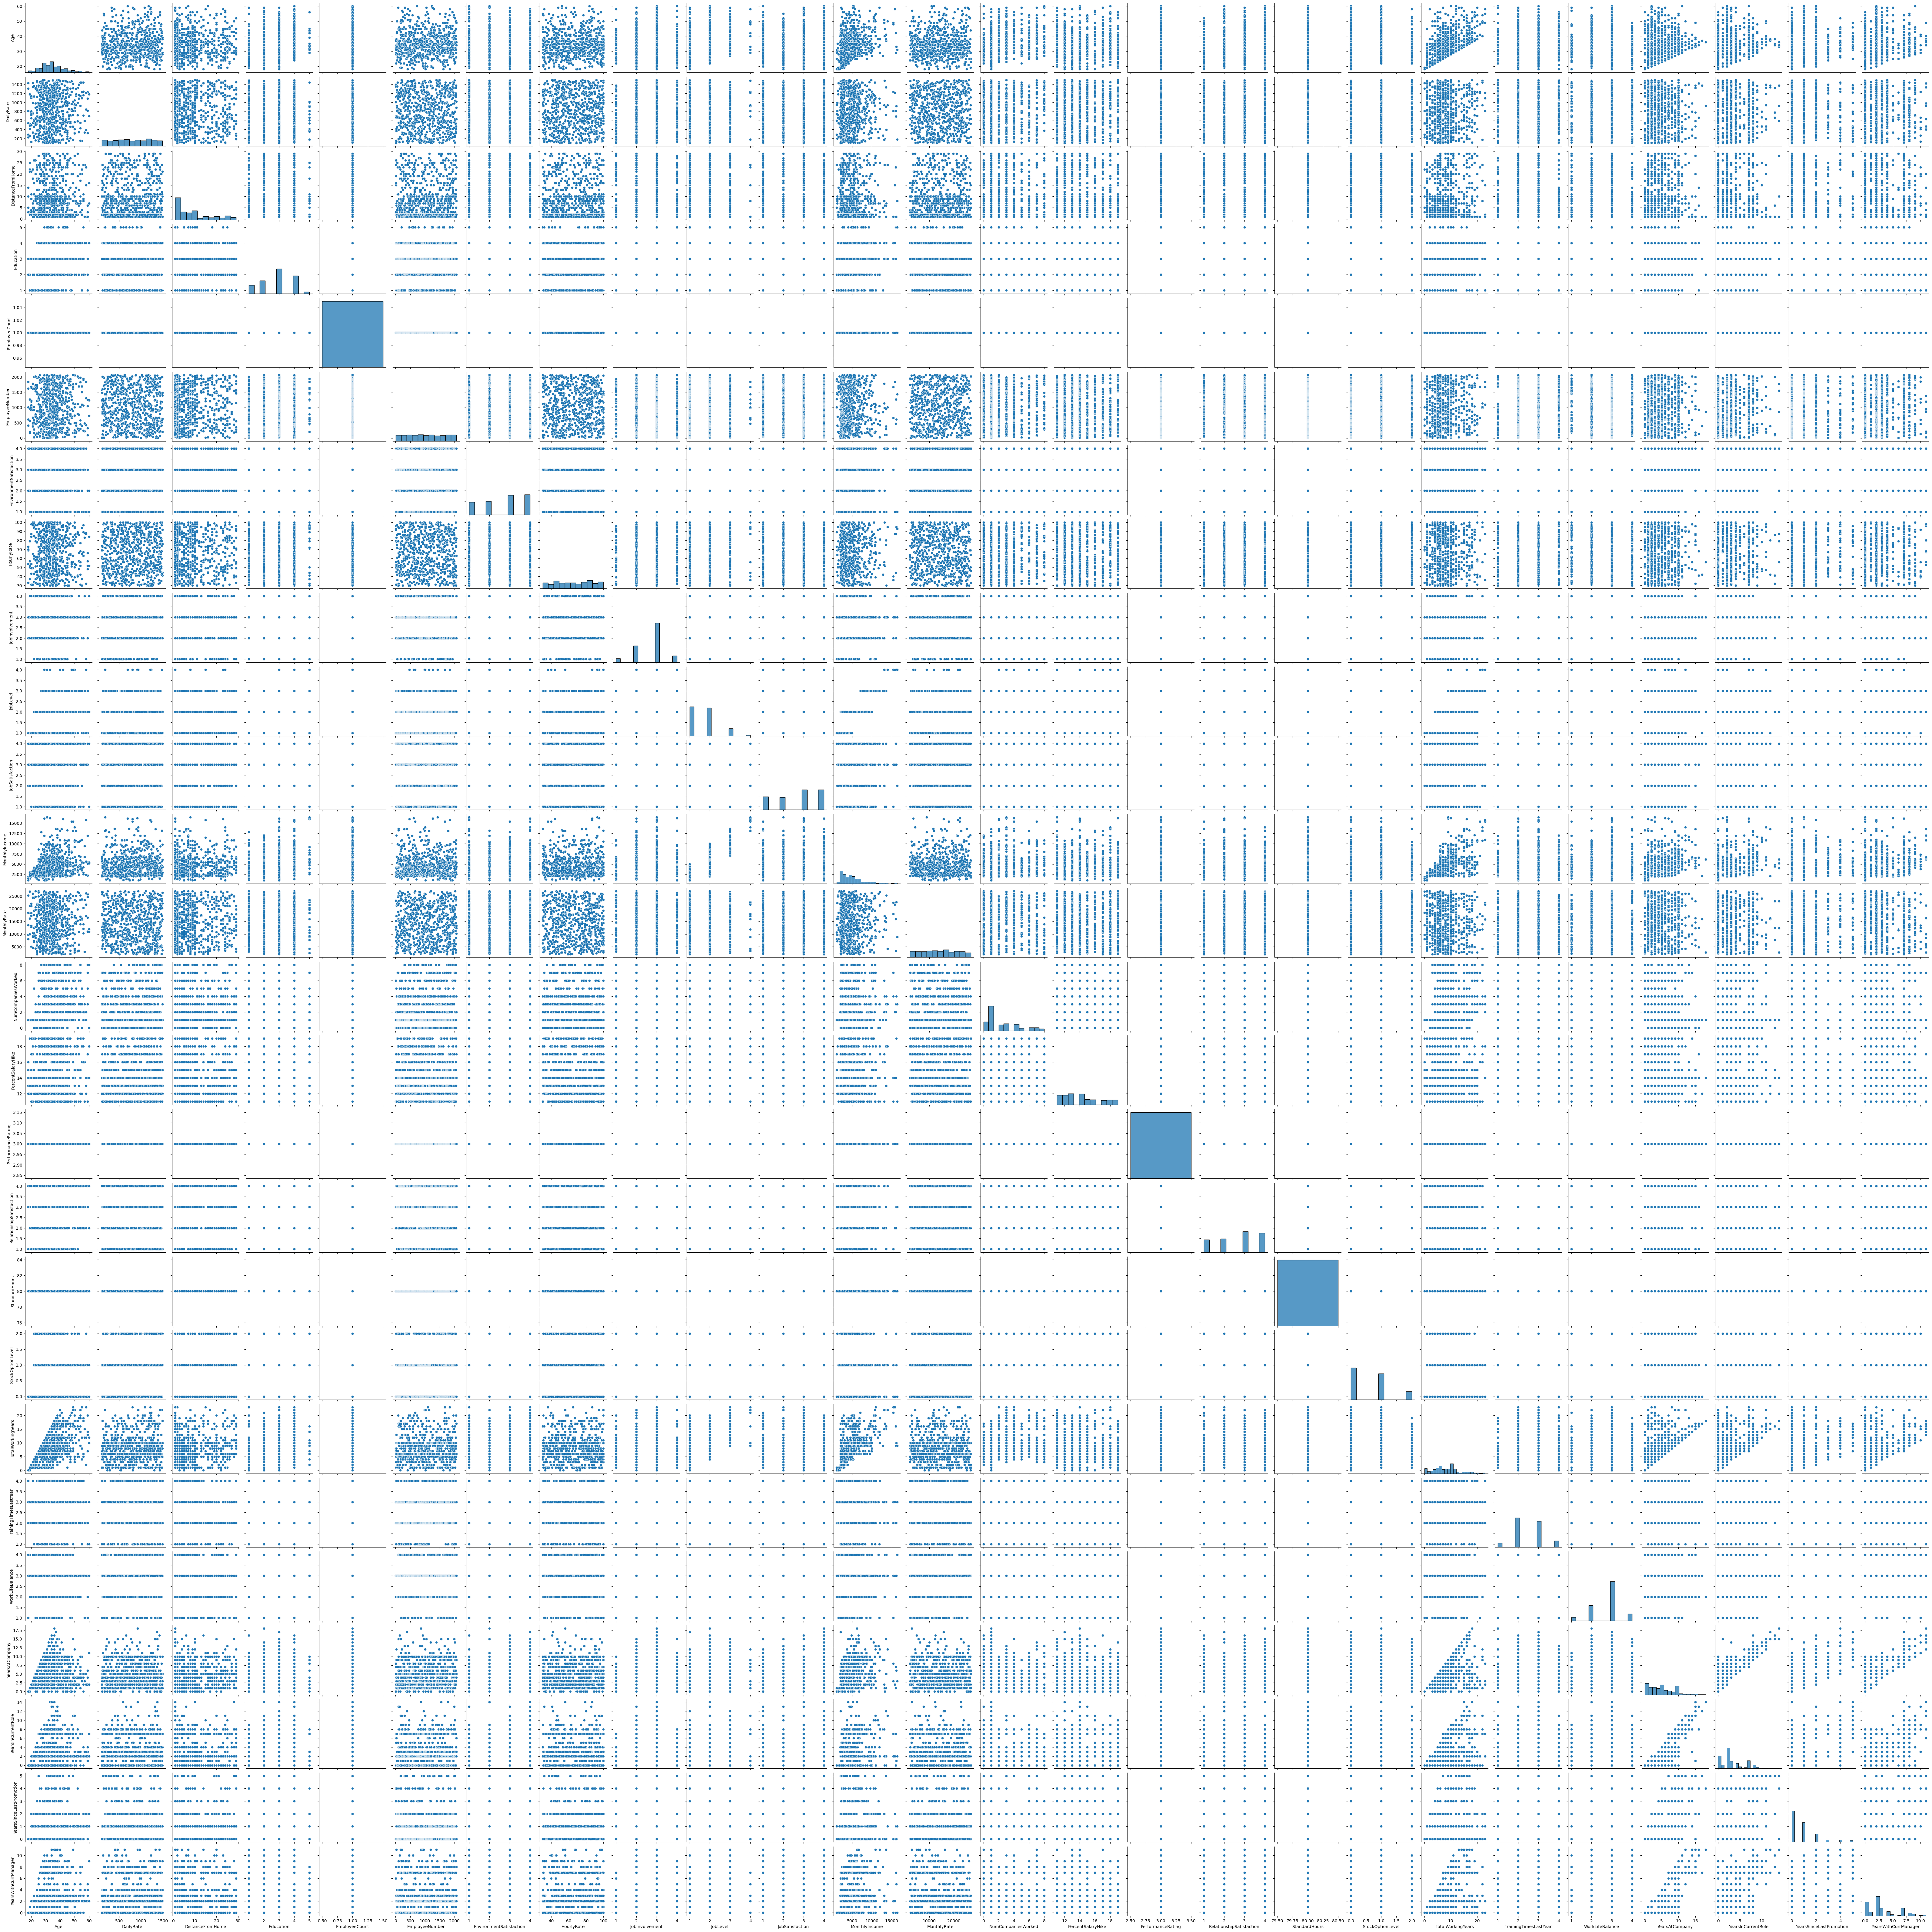

In [88]:
sns.pairplot(numeric_df)
plt.show()

In [165]:
df['Attrition'] = df['Attrition'].replace({'Yes': 1, 'No': 0})

In [166]:
numeric_df = df.select_dtypes(include='number')
z_df=(numeric_df-numeric_df.mean())/numeric_df.std()

In [173]:
age_df=numeric_df['Attrition']

In [168]:
z_df.isna().sum().to_frame('nan_count')

nan_count
Age                               0
Attrition                         0
DailyRate                         0
DistanceFromHome                  0
Education                         0
EmployeeCount                  1470
EmployeeNumber                    0
EnvironmentSatisfaction           0
HourlyRate                        0
JobInvolvement                    0
JobLevel                          0
JobSatisfaction                   0
MonthlyIncome                     0
MonthlyRate                       0
NumCompaniesWorked                0
PercentSalaryHike                 0
PerformanceRating                 0
RelationshipSatisfaction          0
StandardHours                  1470
StockOptionLevel                  0
TotalWorkingYears                 0
TrainingTimesLastYear             0
WorkLifeBalance                   0
YearsAtCompany                    0
YearsInCurrentRole                0
YearsSinceLastPromotion           0
YearsWithCurrManager              0

In [169]:
z_df=z_df.drop(columns=['EmployeeCount'])
z_df=z_df.drop(columns=['StandardHours'])

In [170]:

z_df['sum']=z_df.sum(axis=1)


In [174]:
z_df['Attrition']=age_df
age_df

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

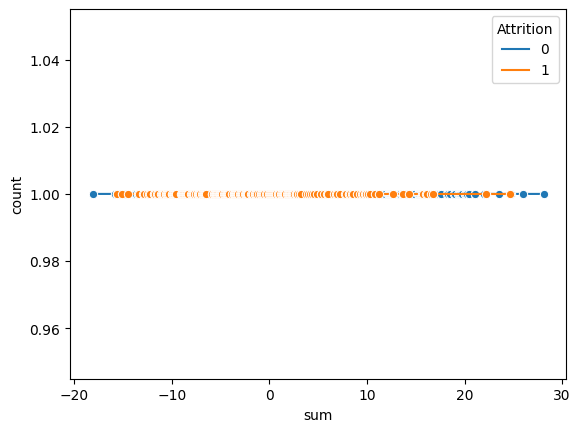

In [178]:
count_df = z_df.groupby(['Attrition','sum']).size().reset_index(name='count')
sns.lineplot(x='sum', y='count', hue='Attrition', data=count_df, marker='o')
plt.show()
#파생변수